# Financial Planning with APIs and Simulations

This notebook contains two sample tools:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 and 10 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

This notebook also contains light analysis sample of results.

In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: A Financial Planner for Emergencies

### Evaluating the Cryptocurrency Wallet by Using the Requests Library



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [4]:
# The monthly amount for the member's household income
monthly_income = 12000


In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Use the json.dumps function to review the response data from the API call, format for legibility
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 19094512,
            "id": 1,
            "last_updated": 1657912484,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 400496718736,
                    "percent_change_1h": 0.915526687472883,
                    "percent_change_24h": 1.37766618055958,
                    "percent_change_7d": -3.13619411333143,
                    "percentage_change_1h": 0.915526687472883,
                    "percentage_change_24h": 1.37766618055958,
                    "percentage_change_7d": -3.13619411333143,
                    "price": 20981.0,
                    "volume_24h": 44070495600
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 19094512,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencie

In [7]:
# An API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
print(json.dumps(eth_response, indent=4, sort_keys=True))


{
    "data": {
        "1027": {
            "circulating_supply": 119691942,
            "id": 1027,
            "last_updated": 1657912489,
            "max_supply": 119691942,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 149706131482,
                    "percent_change_1h": 2.43801927071995,
                    "percent_change_24h": 4.9322232275478,
                    "percent_change_7d": 0.91776524710028,
                    "percentage_change_1h": 2.43801927071995,
                    "percentage_change_24h": 4.9322232275478,
                    "percentage_change_7d": 0.91776524710028,
                    "price": 1251.76,
                    "volume_24h": 16518621059
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 119691942,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurr

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(btc_price)


20981.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(eth_price)


1251.76


In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_price*btc_coins

# Print current value of BTC holding
print(btc_value)


25177.2


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_price*eth_coins

# Print current value of ETH holding
print(eth_value)


6634.3279999999995


In [12]:
# Compute the total value of the cryptocurrency wallet
total_crypto_wallet = eth_value+btc_value

# Print current cryptocurrency wallet balance
print(total_crypto_wallet)


31811.528


### Evaluating the Stock and Bond Holdings by Using the Alpaca SDK


In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [14]:
# Set variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2')

In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['SPY', 'AGG']

# Set timeframe to 1Day
timeframe = '1Day'

# Format current date as ISO format
start_date = pd.Timestamp('2022-07-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-12', tz='America/New_York').isoformat()


In [16]:
# Use the Alpaca get_bars function to get current closing prices the portfolio, create dataframe
stock_portfolio_df = alpaca.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_portfolio_df[stock_portfolio_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = stock_portfolio_df[stock_portfolio_df['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
stock_portfolio_df = pd.concat([SPY,AGG], axis=1, keys=['SPY', 'AGG'])

# Review the first 5 rows of the Alpaca DataFrame
stock_portfolio_df.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-07-12 04:00:00+00:00  383.66  386.16  378.99  380.83  62027220   

                                                     AGG                  \
                          trade_count       vwap    open    high     low   
timestamp                                                                  
2022-07-12 04:00:00+00:00      512244  382.61762  102.02  102.19  101.82   

                                                                   
                            close   volume trade_count       vwap  
timestamp                                                          
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.03944

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = float(stock_portfolio_df['AGG']['close'])

# Print the AGG closing price
print(agg_close_price)


101.84


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = float(stock_portfolio_df['SPY']['close'])

# Print the SPY closing price
print(spy_close_price)


380.83


In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price*agg_shares

# Print the current value of the bond portfolio
print(agg_value)


20368.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price*spy_shares

# Print the current value of the stock portfolio
print(spy_value)


41891.299999999996


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = spy_value+agg_value

# Print the current balance of the stock and bond portion of the portfolio
print(total_stocks_bonds)


62259.299999999996


In [22]:
# Calculate the total value of the member's entire savings portfolio
total_portfolio = total_crypto_wallet+total_stocks_bonds

# Print current value of portfolio
print(total_portfolio)


94070.828


### Evaluate the Emergency Fund




In [23]:
# Consolidate financial assets data
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review list
print(savings_data)
    

[31811.528, 62259.299999999996]


In [24]:
# Create Pandas DataFrame 
savings_df = pd.DataFrame(data=savings_data, index=['crypto','stock/bond'], columns=['amount'])

# Display the DataFrame
print(savings_df)


               amount
crypto      31811.528
stock/bond  62259.300


<AxesSubplot:title={'center':'Savings Composition'}, ylabel='amount'>

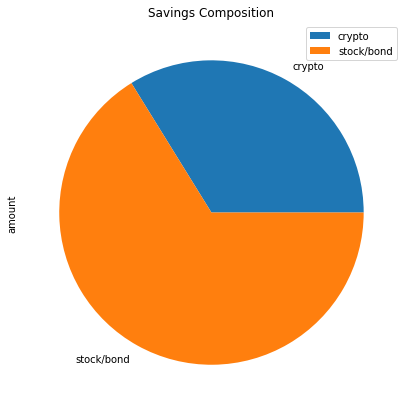

In [25]:
# Plot member's portfolio in a pie chart
savings_df.plot(kind='pie', y='amount', title='Savings Composition', figsize=(10,7))


In [26]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income*3


In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money saved for an emergency fund!')
elif total_portfolio == emergency_fund_value:
    print('Congratulations! You have saved enough money to start an emergency fund!')
else: print(f'You are ${emergency_fund_value-total_portfolio} away from being able to start an emergency fund')


Congratulations! You have enough money saved for an emergency fund!


## Part 2: Create a Financial Planner for Retirement

In [28]:
# Set start and end dates
start_date = pd.Timestamp('2019-07-12', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-07-12', tz='America/New_York').isoformat()

In [29]:
# Use the Alpaca get_bars function and API to get 3 years worth of pricing data
stock_data_df = alpaca.get_bars(
    tickers,
    timeframe,
    start_date,
    end_date
).df

# Reorganize DataFrame
# Separate ticker data
SPY = stock_data_df[stock_data_df['symbol']=='SPY'].drop('symbol', axis=1)
AGG = stock_data_df[stock_data_df['symbol']=='AGG'].drop('symbol', axis=1)
# Concatenate ticker DataFrames
stock_data_df = pd.concat([SPY, AGG],axis=1, keys=['SPY','AGG'])

# Display first and last five rows of DataFrame
print(stock_data_df.head())
print(stock_data_df.tail())


                              SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2019-07-12 04:00:00+00:00  299.86  300.73  299.51  300.65  40511434   
2019-07-15 04:00:00+00:00  301.12  301.13  300.19  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.44  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.74  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.70  298.83  53567032   

                                                      AGG                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2019-07-12 04:00:00+00:00      176835  300.142196  110.67  110.845  110.67   
2019-07-15 04:00:00+00:00      149900  300.605019  110.87  110.960  110.85   
2019-07-16 04:00:00+00:00      183816  30

In [30]:
# Configure Monte Carlo simulation to forecast 30 years cumulative returns
# Weights are .60 SPY .40 AGG.
# Run 500 samples.
MC_30year = MCSimulation(
    stock_data_df,
    weights=[.60, .40],
    num_simulation=500,
    num_trading_days=252*30
)

# Review simulation input data
stock_data_df


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2019-07-12 04:00:00+00:00  299.86  300.73  299.510  300.65  40511434   
2019-07-15 04:00:00+00:00  301.12  301.13  300.190  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.440  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.740  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.700  298.83  53567032   
...                           ...     ...      ...     ...       ...   
2022-07-06 04:00:00+00:00  382.07  385.87  379.600  383.25  69844126   
2022-07-07 04:00:00+00:00  385.12  389.83  383.267  388.99  64172156   
2022-07-08 04:00:00+00:00  387.16  390.64  385.660  388.67  72468892   
2022-07-11 04:00:00+00:00  385.91  386.87  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.16  378.990  380.83  62027220   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-07-12 04:00:00+00:00      176835  300.142196  110.67  110.8450  110.6700   
2019-07-15 04:00:00+00:00      149900  300.605019  110.87  110.9600  110.8500   
2019-07-16 04:00:00+00:00      183816  300.108039  110.75  110.8300  110.6400   
2019-07-17 04:00:00+00:00      200151  298.543544  110.93  111.1400  110.9100   
2019-07-18 04:00:00+00:00      236661  298.067797  111.10  111.3300  111.0600   
...                               ...         ...     ...       ...       ...   
2022-07-06 04:00:00+00:00      614420  382.508286  102.78  102.8000  101.8400   
2022-07-07 04:00:00+00:00      467708  387.621834  101.94  101.9799  101.5200   
2022-07-08 04:00:00+00:00      509776  388.661805  101.35  101.4499  101.1600   
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.9200  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.1900  101.8200   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-12 04:00:00+00:00  110.79  3837088       22044  110.768279  
2019-07-15 04:00:00+00:00  110.95  3619089       10885  110.925638  
2019-07-16 04:00:00+00:00  110.83  2149083       12676  110.743438  
2019-07-17 04:00:00+00:00  111.12  2985610       11771  111.066605  
2019-07-18 04:00:00+00:00  111.30  5982223       17331  111.220550  
...                           ...      ...         ...         ...  
2022-07-06 04:00:00+00:00  101.84  6644945       26799  102.118683  
2022-07-07 04:00:00+00:00  101.61  8220620       17966  101.626894  
2022-07-08 04:00:00+00:00  101.23  5269814       19181  101.268556  
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  

[756 rows x 14 columns]

In [31]:
# Run the Monte Carlo simulation
MC_30year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gtkhh\Desktop\Fintech-Workspace\Challenges\financial_planning_tools\financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002283,1.006832,0.996180,0.989433,1.005193,0.995976,0.994394,0.987133,0.999923,0.995964,...,1.011233,0.997743,1.006267,1.007151,1.006076,1.012356,1.007683,1.004082,0.994217,1.000940
2,0.998343,0.999948,1.006517,1.002123,0.987997,1.000144,0.986290,0.996647,1.001266,0.990891,...,1.011522,1.005324,0.989883,0.995473,1.012565,1.008634,1.012917,1.008533,1.002213,0.995333
3,1.007306,0.971041,1.006031,0.989468,0.979424,1.002900,0.980464,0.999877,1.005818,0.990897,...,0.990721,1.014336,0.990972,0.999989,1.008604,1.011734,0.999424,1.003055,0.997980,0.989082
4,1.011360,0.969835,1.013165,1.001904,0.984365,1.016496,0.982418,0.999814,1.033317,0.989372,...,1.006597,1.014935,0.992642,0.996468,1.016952,1.016393,1.006300,0.999634,1.000088,0.991286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.590308,12.084135,4.576165,2.463920,7.078619,1.312729,3.776717,8.641728,2.349572,6.092356,...,6.034145,10.756686,2.680218,5.654521,7.595760,0.883329,4.202224,3.757223,3.662451,4.263823
7557,3.580487,12.013092,4.548333,2.463908,7.142127,1.316690,3.772728,8.713942,2.381308,6.067996,...,6.071075,10.695444,2.641798,5.662905,7.538501,0.881619,4.233573,3.698218,3.652508,4.284335
7558,3.593484,11.920776,4.527550,2.466846,6.960322,1.330922,3.804558,8.560030,2.409072,6.181493,...,6.065012,10.699928,2.623078,5.585347,7.594211,0.877937,4.253405,3.765186,3.606068,4.330914
7559,3.597522,12.098653,4.543335,2.421564,7.046718,1.318428,3.829361,8.705446,2.406836,6.237344,...,6.087725,10.706482,2.605873,5.636762,7.677282,0.884732,4.199293,3.784921,3.597151,4.305027


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

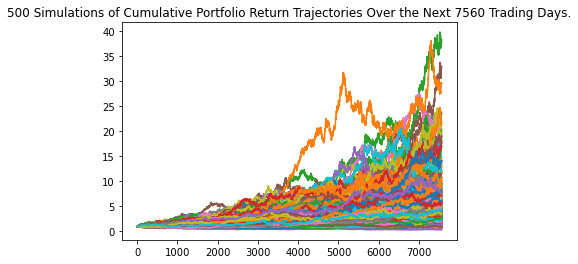

In [32]:
# Visualize 30-year Monte Carlo simulation 
MC_30year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

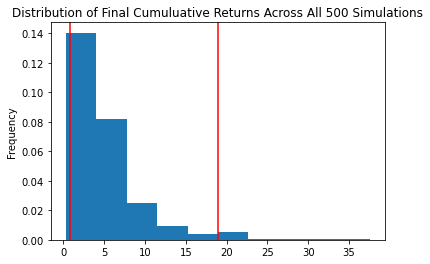

In [33]:
# Visualize the probability distribution of 30-year Monte Carlo simulation 
MC_30year.plot_distribution()


In [34]:
# Generate summary statistics of 30-year Monte Carlo simulation 
simulation_summary = MC_30year.summarize_cumulative_return()


# Review summary statistics
print(simulation_summary)

count           500.000000
mean              5.149095
std               4.561564
min               0.294726
25%               2.288025
50%               3.828521
75%               6.228672
max              37.597379
95% CI Lower      0.825985
95% CI Upper     18.998672
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

In [35]:
# Print current balance of stock and bond portion of portfolio
print(total_stocks_bonds)


62259.299999999996


In [36]:
# Use lower and upper `95%` confidence intervals to calculate the range of possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = total_stocks_bonds*simulation_summary[8]
ci_upper_thirty_cumulative_return = total_stocks_bonds*simulation_summary[9]

# Print the result
print(ci_lower_thirty_cumulative_return)
print(ci_upper_thirty_cumulative_return)


51425.23491789155
1182844.0012449136


### Forecast Cumulative Returns in 10 Years


In [37]:
# Configure Monte Carlo simulation to forecast 10 years cumulative returns
# Weights = .80 SPY .20 AGG (more aggressive)
# Run 500 samples.
MC_10year = MCSimulation(
    stock_data_df,
    weights = [.80, .20],
    num_simulation=500,
    num_trading_days=252*10)

# Review simulation input data
stock_data_df


SPY                                     \
                             open    high      low   close    volume   
timestamp                                                              
2019-07-12 04:00:00+00:00  299.86  300.73  299.510  300.65  40511434   
2019-07-15 04:00:00+00:00  301.12  301.13  300.190  300.75  33992129   
2019-07-16 04:00:00+00:00  300.64  300.88  299.440  299.71  40807546   
2019-07-17 04:00:00+00:00  299.77  299.93  297.740  297.74  44343835   
2019-07-18 04:00:00+00:00  297.18  299.25  296.700  298.83  53567032   
...                           ...     ...      ...     ...       ...   
2022-07-06 04:00:00+00:00  382.07  385.87  379.600  383.25  69844126   
2022-07-07 04:00:00+00:00  385.12  389.83  383.267  388.99  64172156   
2022-07-08 04:00:00+00:00  387.16  390.64  385.660  388.67  72468892   
2022-07-11 04:00:00+00:00  385.91  386.87  383.500  384.23  58100363   
2022-07-12 04:00:00+00:00  383.66  386.16  378.990  380.83  62027220   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2019-07-12 04:00:00+00:00      176835  300.142196  110.67  110.8450  110.6700   
2019-07-15 04:00:00+00:00      149900  300.605019  110.87  110.9600  110.8500   
2019-07-16 04:00:00+00:00      183816  300.108039  110.75  110.8300  110.6400   
2019-07-17 04:00:00+00:00      200151  298.543544  110.93  111.1400  110.9100   
2019-07-18 04:00:00+00:00      236661  298.067797  111.10  111.3300  111.0600   
...                               ...         ...     ...       ...       ...   
2022-07-06 04:00:00+00:00      614420  382.508286  102.78  102.8000  101.8400   
2022-07-07 04:00:00+00:00      467708  387.621834  101.94  101.9799  101.5200   
2022-07-08 04:00:00+00:00      509776  388.661805  101.35  101.4499  101.1600   
2022-07-11 04:00:00+00:00      473423  384.871994  101.67  101.9200  101.6029   
2022-07-12 04:00:00+00:00      512244  382.617620  102.02  102.1900  101.8200   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2019-07-12 04:00:00+00:00  110.79  3837088       22044  110.768279  
2019-07-15 04:00:00+00:00  110.95  3619089       10885  110.925638  
2019-07-16 04:00:00+00:00  110.83  2149083       12676  110.743438  
2019-07-17 04:00:00+00:00  111.12  2985610       11771  111.066605  
2019-07-18 04:00:00+00:00  111.30  5982223       17331  111.220550  
...                           ...      ...         ...         ...  
2022-07-06 04:00:00+00:00  101.84  6644945       26799  102.118683  
2022-07-07 04:00:00+00:00  101.61  8220620       17966  101.626894  
2022-07-08 04:00:00+00:00  101.23  5269814       19181  101.268556  
2022-07-11 04:00:00+00:00  101.70  5758310       17084  101.720884  
2022-07-12 04:00:00+00:00  101.84  6664991       21057  102.039440  

[756 rows x 14 columns]

In [38]:
# Run Monte Carlo simulation
MC_10year.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\gtkhh\Desktop\Fintech-Workspace\Challenges\financial_planning_tools\financial_planning\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993547,0.996043,0.987838,0.985475,1.013072,1.016466,1.008639,1.004663,0.997466,0.992949,...,0.994113,0.997083,0.997451,1.015699,0.995107,0.990194,1.035961,1.014173,1.003765,1.017473
2,0.991276,0.988393,0.989534,0.988532,1.017151,1.029171,1.013709,1.015409,0.994960,0.991839,...,1.010917,1.001418,1.003879,1.028558,0.971610,1.006579,1.056788,0.986325,1.012515,1.012368
3,0.974114,0.983048,0.979347,0.987693,1.034418,1.043565,0.999510,1.015421,1.004018,1.007348,...,0.995203,1.019187,0.992005,1.035830,0.980685,1.016640,1.072870,0.981299,1.015772,1.019736
4,0.944225,0.983321,0.991905,0.998858,1.025530,1.074952,0.986636,1.034819,1.013685,1.009466,...,0.987958,1.035939,1.005313,1.037202,0.987470,1.019669,1.082113,1.013243,1.004640,1.019768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.830562,2.458567,1.377668,4.094995,2.669290,3.379436,1.428604,1.735847,2.253265,4.053686,...,0.680746,2.063339,3.735714,1.717678,1.347975,1.513006,0.879688,0.910222,2.394925,5.478272
2517,0.840187,2.461884,1.366455,4.103280,2.713630,3.375232,1.418793,1.750890,2.195308,4.025202,...,0.679654,2.030953,3.662062,1.739838,1.358236,1.509877,0.873179,0.931480,2.416716,5.420261
2518,0.836745,2.454681,1.367222,4.126357,2.721667,3.402704,1.413704,1.735988,2.251347,4.031120,...,0.683759,2.017116,3.701675,1.710884,1.339815,1.498424,0.882471,0.935665,2.358545,5.450065
2519,0.858824,2.508091,1.363543,4.160516,2.760695,3.458737,1.431895,1.771862,2.225158,4.036322,...,0.687754,1.996309,3.642999,1.710840,1.343637,1.514189,0.878130,0.962771,2.358363,5.405570


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

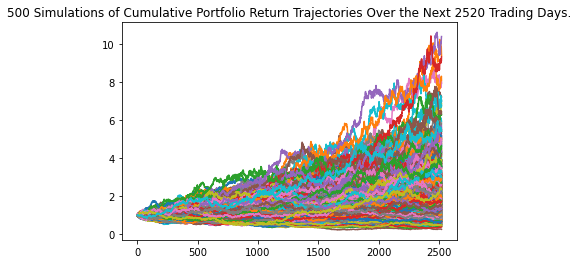

In [39]:
# Visualize 10-year Monte Carlo simulation
MC_10year.plot_simulation()


<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

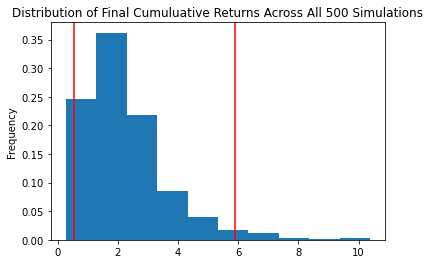

In [40]:
# Visualize probability distribution of 10-year Monte Carlo simulation
MC_10year.plot_distribution()


In [41]:
# Generate summary statistics of 10 year simulation
simulation_summary = MC_10year.summarize_cumulative_return()


# Review summary statistics
print(simulation_summary)

count           500.000000
mean              2.242853
std               1.438920
min               0.271123
25%               1.288162
50%               1.905427
75%               2.805197
max              10.382012
95% CI Lower      0.542970
95% CI Upper      5.895008
Name: 2520, dtype: float64


#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
print(total_stocks_bonds)


62259.299999999996


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = simulation_summary[8]*total_stocks_bonds
ci_upper_ten_cumulative_return = simulation_summary[9]*total_stocks_bonds

# Print the result of your calculations
print(ci_lower_ten_cumulative_return)
print(ci_upper_ten_cumulative_return)


33804.93579750347
367019.04340802424


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?